# Work sample: Data quality check and improvements
This work sample is about checking the data quality of fictitious companies and developing
suggestions for improvement. The choice of your working tools is up to you, example SQL
statements for solving the tasks in part 1 are an advantage

## Part 1: Data Quality Check
a) **Check the data integrity** of the company file, especially for **missing** or **inconsistent values**
in important fields such as **name**, **address** and so on. How do you identify these values?

b) Identify and **remove duplicate entries** in the file to improve data quality.

c) Check the **data format** in the company file and **correct any errors**, e.g. incorrect date
formats.

d) What else do you notice about the data set?

In [1]:
# !pip install pandas
# !pip install pandasql

## Task 1a) - 1c)

In [2]:
import pandas as pd
import pandasql as ps

In [3]:
path = '/home/katherine/Development/creditsafe/company_data.csv'

In [4]:
df = pd.read_csv(path, header=0)

In [5]:
# To maintain the appropriate datatype for the num_cols, they were dropped from the df before converting the df to object type
num_cols = ['rating_points', 'limit_value']
df_object_cols = df.drop(num_cols, axis = 1)
df_object_cols = df_object_cols.astype(object).where(pd.notnull(df), None)

In [6]:
# preparing num_cols to be joined with formatted object_cols
object_cols = list(df_object_cols.columns)
df_num_cols = df.drop(object_cols, axis = 1)


In [7]:
# joining object_cols and num_cols with their appropriate data formats
df = df_object_cols.join(df_num_cols)

In [8]:
df

,company_id,company_name,company_status_de,legal_form_en,activity_code1,company_registration_date,addr_street,addr_house_number,addr_postal_code,addr_city,rating_points,limit_value
0,f5900a3252ebb21c6e18e94c783c445b,company 1,Aktiv,Private limited company,6420.0,1974-12-20,719c82b4cea5d4500370e98d746f5961,None,71711.0,Murr,90,10500
1,f5e36bf97ded1f2af752fa7c9b53b5d1,company 2,Aktiv,Public limited company,4321.0,1999-06-05,e89d4bea79a8330aa771135b3e872386,None,75179.0,Pforzheim,76,0
2,2bdb6d8dc20af7edfe21434ca748e92b,company 3,Aktiv,Registered merchant,10720.0,2002-09-09,2b462b295540e1e60a1b104a6f9f66de,None,30519.0,Hannover,93,10000
3,7a183029fd15b1ef32b539722727a66e,company 4,Aktiv,Private limited company,32503.0,1990-12-28,12aeb4421f3f895e606d666d58c50f14,None,39638.0,Gardelegen,84,185000
4,8849c8250c5cad751271fcd139c738ee,company 5,Aktiv,Limited partnership,22290.0,1983-02-18,None,None,57482.0,Wenden,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0082f2aa81b8c6a8d25c8e150cb51a71,company 4996,Aktiv,Registered merchant,71122.0,1985-02-27,5cf21fe0d90915fd4e22738f12e5e4a5,None,63179.0,Obertshausen,83,0
4996,3f0fc44a4043cd87bcbdcdac57f76e73,company 4997,Aktiv,Registered merchant,27900.0,1997-10-16,cc6cbee522f314fb536eadd75e305549,None,44795.0,Bochum,12,10000
4997,56729ae0a3afad5a8a35a08996d4d320,company 4998,Aktiv,Private limited company,43999.0,1984-07-28,5854187f5d0c89d052a8f0ec1bd5643c,None,59602.0,Rüthen,30,0
4998,387b3f25f1e4031c53c80b5ad73a351a,company 4999,Aktiv,Limited partnership in which the general partn...,43210.0,1998-01-12,07df6fd5fdb4e2aeaada4f2239cc4bcf,None,48727.0,Billerbeck,6,10500


In [9]:
def sum_missing_values(df):
  '''function to summarize status of missing values within a df'''
  missing_v_sum = df.isnull().sum()
  return missing_v_sum.sort_values(ascending=False)

missing_v_sum = sum_missing_values(df)
missing_v_sum

addr_house_number            5000
activity_code1                324
addr_street                   103
addr_postal_code               38
addr_city                       3
company_id                      0
company_name                    0
company_status_de               0
legal_form_en                   0
company_registration_date       0
rating_points                   0
limit_value                     0
dtype: int64

In [10]:
#company_id shoud be unique
def check_uniqueness_of_values_in_col(df, col):
  '''function that returns the number of duplicate entries in the specified column'''
  len_c_ids = len(df[col])
  len_unique_c_ids = len(df[col].unique())
  result = len_c_ids - len_unique_c_ids
  return result

check_uniqueness_of_values_in_col(df, 'company_id')


2

In [11]:
# approving the pattern of the values is as expected --> str(string+space+int)
def check_pattern(df, col):
  '''function to approve the pattern of the values is as expected'''
  df[col] = df[col].str.lower()
  df[col] = df[col].str.replace(' ', '')
  df[col] = df[col].str.replace(r"([a-zA-Z]+)(\d+)", r"\1 \2", regex=True)

  return df[col]

In [12]:
company_name_check = check_pattern(df, 'company_name')
company_name_check

0          company 1
1          company 2
2          company 3
3          company 4
4          company 5
            ...     
4995    company 4996
4996    company 4997
4997    company 4998
4998    company 4999
4999    company 5000
Name: company_name, Length: 5000, dtype: object

In [13]:
# checking if the overall values in given colum are plausible by creating an overview
def overview_unique_values(df, col):
    overview = df[col].unique()
    overview = sorted(overview)
    return overview

In [14]:
overview_company_status_de = overview_unique_values(df, 'company_status_de')
overview_company_status_de

['Aktiv']

In [15]:
overview_company_status_de = overview_unique_values(df, 'legal_form_en')
overview_company_status_de

['Combination of AG and general partnership',
 'Combination of GmbH and general partnership',
 'Entrepreneurial company (with limited liability)',
 'General partnership',
 'Limited Liability Company (LLC) - American private limited company',
 'Limited partnership',
 'Limited partnership in which the general partner is a GmbH',
 'Limited partnership in which the general partner is a GmbH, with shares',
 'Limited partnership in which the general partner is an AG',
 'Limited partnership in which the general partner is an entrepreneurial company (with limited liability)',
 'Limited partnership in which the liable partner is a foundation',
 'Limited partnership with partnership limited by shares',
 'Non-profit company with limited liability',
 'Other legal form',
 'Partnership',
 'Private company limited by shares - English private limited company',
 'Private limited company',
 'Public limited company',
 'Public-law institution',
 'Registered association',
 'Registered co-operative',
 'Regi

In [16]:
# does not work if decimal >= 0.1
def float_to_string(df, col):
    '''converts floats to strings and removes the ".0" behind it'''
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace('.0', '')
    return df[col]

In [17]:
activity_code1_str = float_to_string(df, 'activity_code1')
activity_code1_str

0        6420
1        4321
2       10720
3       32503
4       22290
        ...  
4995    71122
4996    27900
4997    43999
4998    43210
4999    41201
Name: activity_code1, Length: 5000, dtype: object

In [18]:
postal_code_str = float_to_string(df, 'addr_postal_code')
postal_code_str

0       71711
1       75179
2       30519
3       39638
4       57482
        ...  
4995    63179
4996    44795
4997    59602
4998    48727
4999    12489
Name: addr_postal_code, Length: 5000, dtype: object

In [19]:
addr_house_number_str = float_to_string(df, 'addr_house_number')
addr_house_number_str

0       None
1       None
2       None
3       None
4       None
        ... 
4995    None
4996    None
4997    None
4998    None
4999    None
Name: addr_house_number, Length: 5000, dtype: object

In [20]:
# "None" shouldn't be in numeric (int-type) columns
query = 'SELECT * FROM df WHERE rating_points == "None" OR limit_value == "None";'
filter_df = pd.DataFrame(ps.sqldf(query, locals()))
filter_df

,company_id,company_name,company_status_de,legal_form_en,activity_code1,company_registration_date,addr_street,addr_house_number,addr_postal_code,addr_city,rating_points,limit_value


In [21]:
# checking if the datatype of rating_points is plausible
df['rating_points'].astype(int)
df['rating_points'].dtypes

dtype('int64')

In [22]:
# checking if the datatype of limit_value is plausible
df['limit_value'].astype(int)
df['limit_value'].dtypes

dtype('int64')

In [23]:
# format dates to match "%Y-%m-%d" and force errors like 0051-13-12, to be converted to Nat (Not a Time)
df['company_registration_date'] = pd.to_datetime(df['company_registration_date'], errors='coerce')
df['company_registration_date'].dtypes

dtype('<M8[ns]')

In [24]:
# Duplikate entfernen
df = df.drop_duplicates()

## Task 1d)
The company_id and the addr_street are encoded, possibly to hide real sensitiv data. Nevertheless, strictly without any further information provided, it lowers the integrity of the data. Except for this I edited everything I noticed.

In [25]:
df

,company_id,company_name,company_status_de,legal_form_en,activity_code1,company_registration_date,addr_street,addr_house_number,addr_postal_code,addr_city,rating_points,limit_value
0,f5900a3252ebb21c6e18e94c783c445b,company 1,Aktiv,Private limited company,6420,1974-12-20,719c82b4cea5d4500370e98d746f5961,None,71711,Murr,90,10500
1,f5e36bf97ded1f2af752fa7c9b53b5d1,company 2,Aktiv,Public limited company,4321,1999-06-05,e89d4bea79a8330aa771135b3e872386,None,75179,Pforzheim,76,0
2,2bdb6d8dc20af7edfe21434ca748e92b,company 3,Aktiv,Registered merchant,10720,2002-09-09,2b462b295540e1e60a1b104a6f9f66de,None,30519,Hannover,93,10000
3,7a183029fd15b1ef32b539722727a66e,company 4,Aktiv,Private limited company,32503,1990-12-28,12aeb4421f3f895e606d666d58c50f14,None,39638,Gardelegen,84,185000
4,8849c8250c5cad751271fcd139c738ee,company 5,Aktiv,Limited partnership,22290,1983-02-18,None,None,57482,Wenden,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0082f2aa81b8c6a8d25c8e150cb51a71,company 4996,Aktiv,Registered merchant,71122,1985-02-27,5cf21fe0d90915fd4e22738f12e5e4a5,None,63179,Obertshausen,83,0
4996,3f0fc44a4043cd87bcbdcdac57f76e73,company 4997,Aktiv,Registered merchant,27900,1997-10-16,cc6cbee522f314fb536eadd75e305549,None,44795,Bochum,12,10000
4997,56729ae0a3afad5a8a35a08996d4d320,company 4998,Aktiv,Private limited company,43999,1984-07-28,5854187f5d0c89d052a8f0ec1bd5643c,None,59602,Rüthen,30,0
4998,387b3f25f1e4031c53c80b5ad73a351a,company 4999,Aktiv,Limited partnership in which the general partn...,43210,1998-01-12,07df6fd5fdb4e2aeaada4f2239cc4bcf,None,48727,Billerbeck,6,10500


## Part 2: Concept development and recommendations for action
After the data quality check, it is a very important task for us to **improve the quality of the data
pipelines** and **drive forward technical developments**.

a) <u>Make a detailed proposal and develop a
concept (e.g. through a flowchart) on how this can be achieved.</u>

* The starting point is the delivery of a new file from one of our suppliers that needs to be imported
into the production system.

* The file has to run through several databases ( STAGE, LIVE ) and is
delivered every day.

b) Which tools would you be using within the concept?

c) which KPIs make sense to monitor the process?

d) This file contains data on German companies and their directors. The company itself and the
directors are not pre-matched to our dataset.

* Please suggest what might be good matching keys for the company data and the person data.

## Task 2a) Concept development
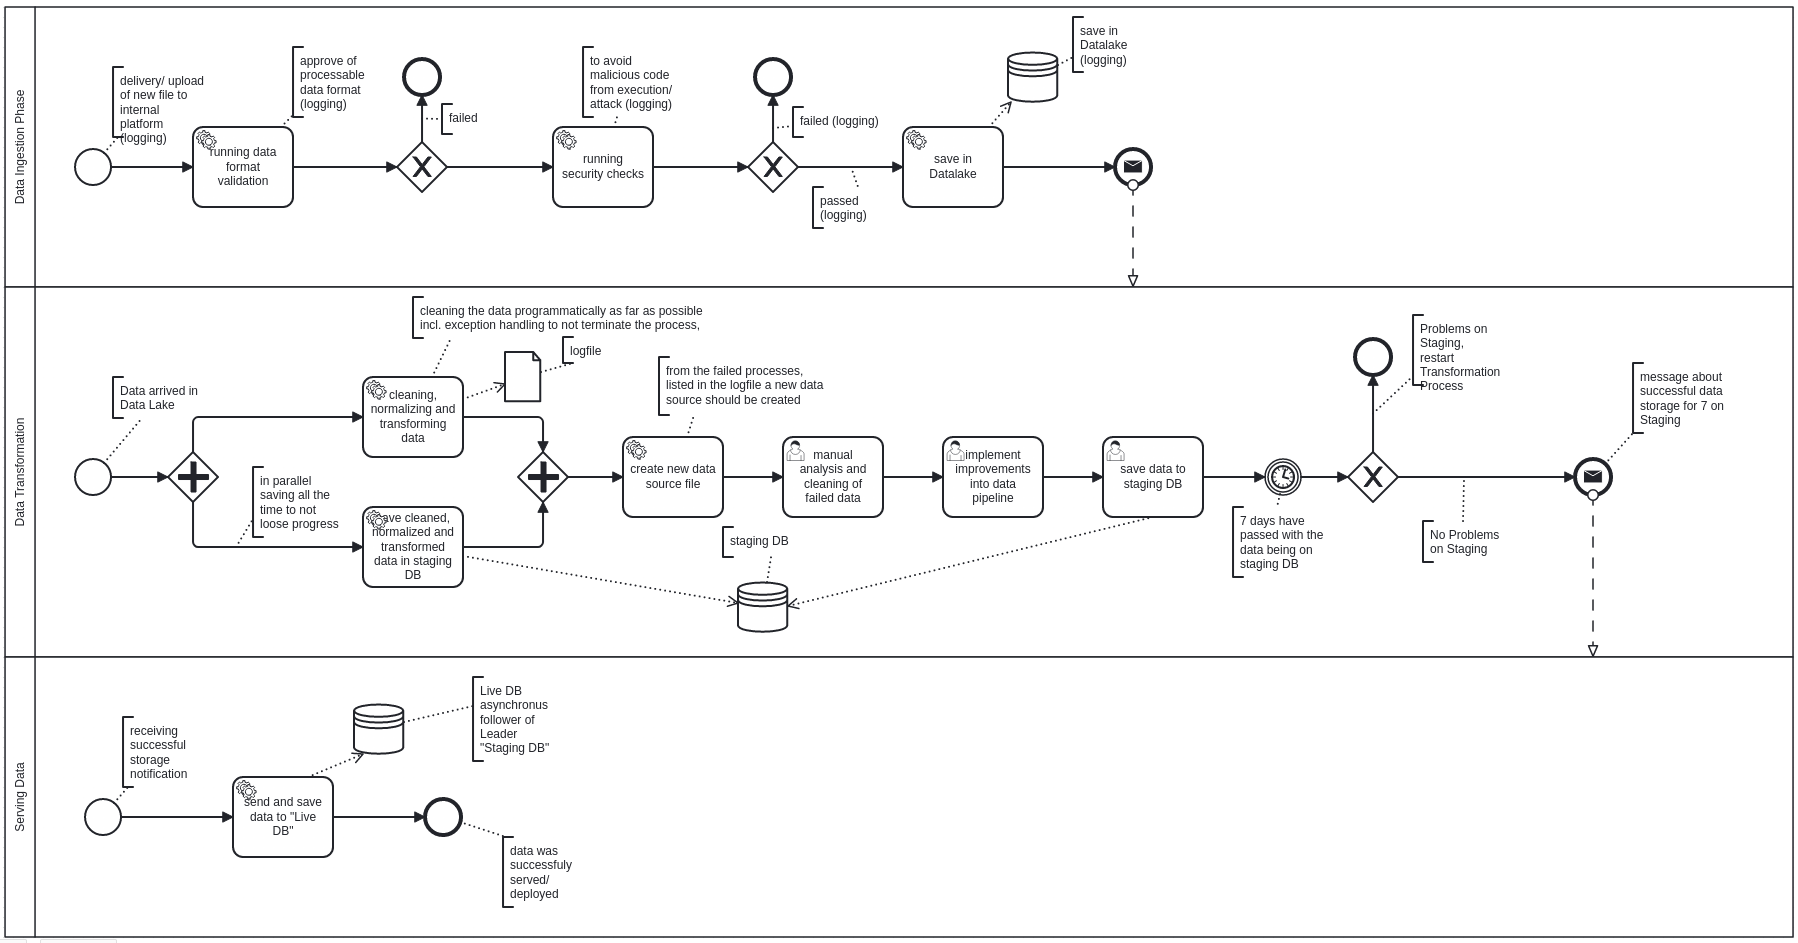


**Phase 1: Data Ingestion**
- The process begins with the **delivery/upload of a new file** to the internal platform, where a **data format validation** is conducted.
- If the format is incorrect, the process is **logged** and stopped. If the format is correct, the data undergoes **security checks**.
- Once the security check is passed, the data is saved in a **Data Lake**.

**Phase 2: Data Transformation**
- The data in the Data Lake is **cleaned, normalized, and transformed**. This process is designed to be fault-tolerant, logging errors without stopping.
- In parallel, the **cleaned, transformed, and normalized data** is saved into a **staging database**.
- If there are issues during this stage, a new data source file is created from the failed processes as listed in the log file, which then undergoes **manual analysis and cleaning**.

**Phase 3: Serving Data**
- After 7 days in the staging database without issues, the data is considered for deployment to the **Live DB**.
- The Live DB acts as an asynchronous follower of the "Staging DB".
- Upon successful deployment to the Live DB the iterations ends

*all steps of the process are logged to be able to learn from them and traceback (security) issues

*(source: J. Reis & M. Housley, Fundamentals of Data Engineering, 2022)*

## Task 2b) Tools

- **Data Ingestion:** custom platform developed with Python and libraries + django
  
- **Data Format Validation and Security Checks:** compination of custom python and bash scripts, or specialised software for format checks and security tools

- **Data Lake Storage:** Amazon S3

- **Data Cleaning and Transformation:** Python Pandas for data manipulation, if required lib PySpark on Apache Spark to distribute data between the nodes efficently

- **Staging Database:** PostgreSQL for relational data structures (comes with integrated Leader-Follower-Replication Option and other great features)

- **Manual Analysis and Cleaning:** Python and libraries (pd, np, seaborn)

- **Live Database Integration:** Apache Airflow for data orchestration


- **Basic Techonologies:** Git + GitLab for version control, Jenkins to automating deployment processes
- **Core Principles:** decoupled, containerd services to improove maintenaince and exchangeability --> Technology: Docker possibly managed and orchestrated by Kubernetes tbd

- **Overall Data Architecture:** tbd based on needs

*(source: M.Kleppmann, Datenintensive Anwendungen designen, 2019)*

## Task 2c) KPIs


**Data Ingestion:**

* Ingestion Time: duration of getting the data and saving it
* Data Volume: amount of data ingested within specified time
* Ingestion Success Rate: percentage of successful data loads vs. failures

**Data Cleaning and Transformation:**
* Transformation Errors: The number of errors encountered during data transformations.
* Clean Data Ratio: The proportion of records deemed clean after processing.
* Processing Latency: The time taken to clean and transform data.

**Infrastructure KPIs:**
* Resource Utilization: CPU, memory, and storage usage
* Scaling Efficiency: How well the system scales in response to workload changes

**General Process KPIs:**
* Pipeline Uptime: The percentage of time the data pipeline is operational without failures
* Data Processing Throughput: The amount of data processed in a given timeframe

**Costs:**
* Storage Costs: The cost associated with storing the ingested data
* Ressource Utilization Costs



## Task 2d) Matching Companies and Directors

* companies can be identifyed by their VAT ID
* a person can be identified by the name combined with the Handelsregister-Nummer (HRA and HRB)